# Propagating uncertainty using Monte-Carlo simulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def monte_carlo_cube_volume(measurements, resolution, num_simulations=100000):
    # Calculate mean and standard deviation of measurements
    mean_height = np.mean(measurements)
    std_height = np.std(measurements, ddof=1)
    
    # Type B uncertainty (assuming rectangular distribution for resolution)
    u_b = resolution / np.sqrt(3)
    
    # Combine Type A and Type B uncertainties
    u_c = np.sqrt((std_height / np.sqrt(len(measurements)))**2 + u_b**2)
    
    # Generate Monte Carlo simulations
    simulated_heights = np.random.normal(mean_height, u_c, num_simulations)
    
    # Calculate volumes
    simulated_volumes = simulated_heights**3
    
    # Calculate results
    mean_volume = np.mean(simulated_volumes)
    std_volume = np.std(simulated_volumes)
    
    # Calculate coverage interval (95%)
    coverage_interval = np.percentile(simulated_volumes, [2.5, 97.5])
    
    print(f"Mean height: {mean_height:.6f}")
    print(f"Combined standard uncertainty of height: {u_c:.6f}")
    print(f"Mean volume: {mean_volume:.6f}")
    print(f"Standard uncertainty of volume: {std_volume:.6f}")
    print(f"95% coverage interval for volume: [{coverage_interval[0]:.6f}, {coverage_interval[1]:.6f}]")
    
    # Plot histogram of simulated volumes
    plt.figure(figsize=(10, 6))
    plt.hist(simulated_volumes, bins=100, density=True, alpha=0.7, color='skyblue')
    plt.axvline(mean_volume, color='red', linestyle='dashed', linewidth=2, label='Mean Volume')
    plt.axvline(coverage_interval[0], color='green', linestyle='dashed', linewidth=2, label='95% Coverage Interval')
    plt.axvline(coverage_interval[1], color='green', linestyle='dashed', linewidth=2)
    plt.xlabel('Volume')
    plt.ylabel('Probability Density')
    plt.title('Distribution of Cube Volumes (Monte Carlo Simulation)')
    plt.legend()
    plt.show()



Mean height: 10.021000
Combined standard uncertainty of height: 0.006227
Mean volume: 1006.310777
Standard uncertainty of volume: 1.874921
95% coverage interval for volume: [1002.653990, 1009.980116]


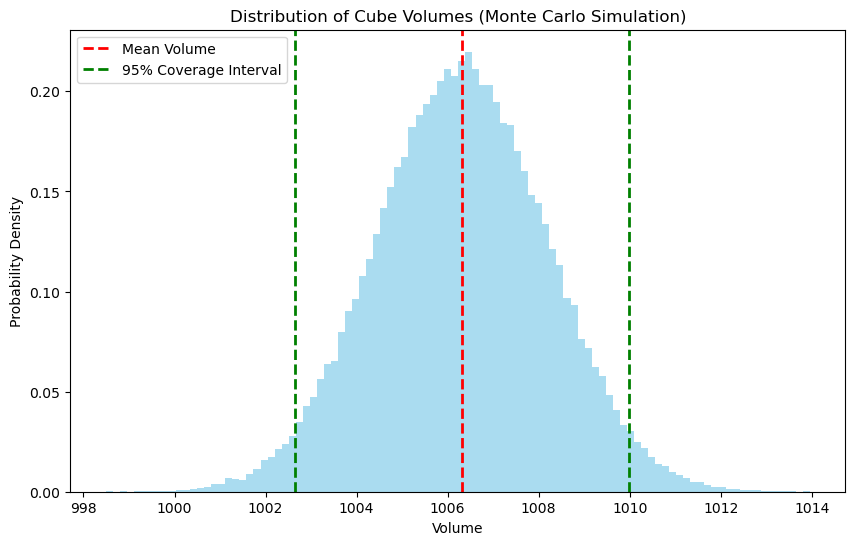

In [3]:
# Example usage
height_measurements = [10.02, 10.03, 10.01, 10.02, 10.03, 10.02, 10.01, 10.02, 10.03, 10.02]
resolution = 0.01  # mm
monte_carlo_cube_volume(height_measurements, resolution)